In [13]:
from src.robin.plotter.entities import KernelPlotter

kernel_plotter = KernelPlotter(path="../src/robin/kernel/output_renfe_new.csv")

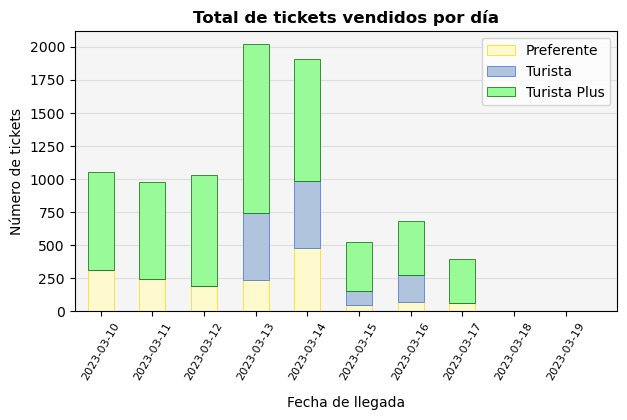

In [14]:
kernel_plotter.plot_tickets_sold(save_path="total_tickets_sold.png")

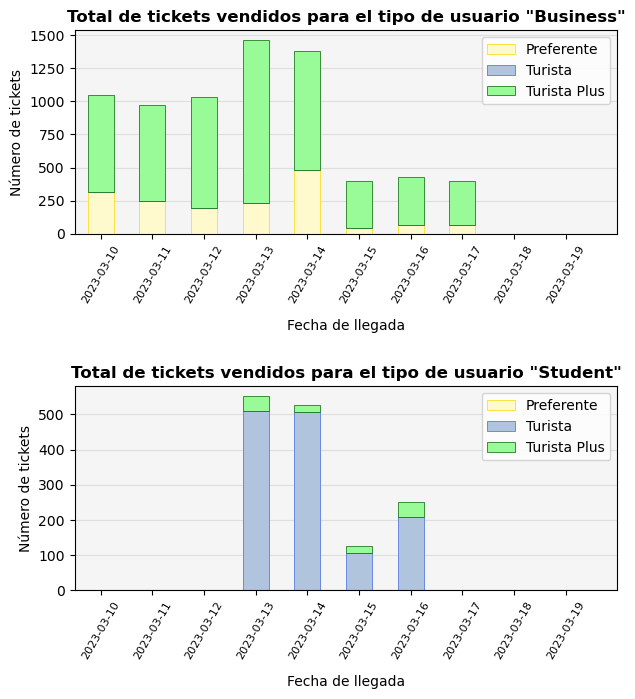

In [15]:
kernel_plotter.plot_tickets_by_user(save_path="tickets_sold_per_usertype.png")

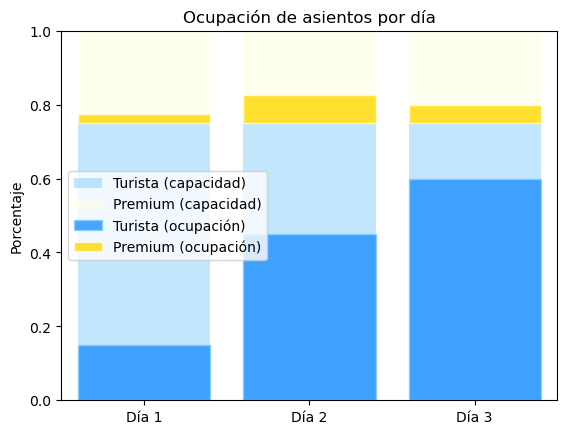

In [20]:
import matplotlib.pyplot as plt

# Datos de ejemplo
tipos_asiento = ['Turista', 'Premium']
capacidades = [0.75, 0.25]
ocupaciones = [[0.2, 0.1], [0.6, 0.3], [0.8, 0.2]]

# Colores de las barras
colores_capacidad = ['lightskyblue', 'lightyellow']
colores_ocupacion = ['dodgerblue', 'gold']

# Crear la figura y los ejes
fig, ax = plt.subplots()

# Crear las barras de capacidad y ocupación para cada día y tipo de asiento
for i, ocupacion in enumerate(ocupaciones):
    # Barras de capacidad
    capacidad_acum = 0
    for j, capacidad in enumerate(capacidades):
        if j == 0:
            # Barra de capacidad de tipo Turista
            ax.bar(i, capacidad, bottom=0, color=colores_capacidad[j], alpha=0.5)
            capacidad_acum = capacidad
        else:
            # Barra de capacidad de tipo Premium
            ax.bar(i, capacidad, bottom=capacidad_acum, color=colores_capacidad[j], alpha=0.5)

    # Barras de ocupación
    ocupacion_acum = 0
    for j, o in enumerate(ocupacion):
        if j == 0:
            # Barra de ocupación de tipo Turista
            ax.bar(i, o*capacidades[j], bottom=0, color=colores_ocupacion[j], alpha=0.8, edgecolor=colores_capacidad[j])
            ocupacion_acum = o*capacidades[j]
        else:
            # Barra de ocupación de tipo Premium
            ax.bar(i, o*capacidades[j], bottom=capacidad_acum, color=colores_ocupacion[j], alpha=0.8, edgecolor=colores_capacidad[j])
            ocupacion_acum += o*capacidades[j]

# Ajustar los límites y etiquetas de los ejes
ax.set_ylim(0, 1)
ax.set_xlim(-0.5, len(ocupaciones)-0.5)
ax.set_xticks(range(len(ocupaciones)))
ax.set_xticklabels(['Día 1', 'Día 2', 'Día 3'])
ax.set_ylabel('Porcentaje')
ax.set_title('Ocupación de asientos por día')

# Agregar la leyenda
ax.legend(['Turista (capacidad)', 'Premium (capacidad)', 'Turista (ocupación)', 'Premium (ocupación)'])

plt.show()